In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [30]:
data.duplicated().sum()

0

In [31]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [32]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [33]:
print('Blood Pressure  :', data['BP'].unique())
print('Cholesterol     : ', data['Cholesterol'].unique())
print('Drugs           : ', data['Drug'].unique())

Blood Pressure  : ['HIGH' 'LOW' 'NORMAL']
Cholesterol     :  ['HIGH' 'NORMAL']
Drugs           :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [34]:
data['Sex']=data['Sex'].map({'F':1,'M':0}).astype(int)
data['BP']=data['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2}).astype(int)
data['Cholesterol']=data['Cholesterol'].map({'HIGH':1,'NORMAL':0}).astype(int)

In [35]:
cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = data[cols].values
Y = data['Drug'].values

In [36]:
X

array([[23.   ,  1.   ,  2.   ,  1.   , 25.355],
       [47.   ,  0.   ,  0.   ,  1.   , 13.093],
       [47.   ,  0.   ,  0.   ,  1.   , 10.114],
       [28.   ,  1.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  1.   ,  0.   ,  1.   , 18.043],
       [22.   ,  1.   ,  1.   ,  1.   ,  8.607],
       [49.   ,  1.   ,  1.   ,  1.   , 16.275],
       [41.   ,  0.   ,  0.   ,  1.   , 11.037],
       [60.   ,  0.   ,  1.   ,  1.   , 15.171],
       [43.   ,  0.   ,  0.   ,  0.   , 19.368],
       [47.   ,  1.   ,  0.   ,  1.   , 11.767],
       [34.   ,  1.   ,  2.   ,  0.   , 19.199],
       [43.   ,  0.   ,  0.   ,  1.   , 15.376],
       [74.   ,  1.   ,  0.   ,  1.   , 20.942],
       [50.   ,  1.   ,  1.   ,  1.   , 12.703],
       [16.   ,  1.   ,  2.   ,  0.   , 15.516],
       [69.   ,  0.   ,  0.   ,  0.   , 11.455],
       [43.   ,  0.   ,  2.   ,  1.   , 13.972],
       [23.   ,  0.   ,  0.   ,  1.   ,  7.298],
       [32.   ,  1.   ,  2.   ,  0.   , 25.974],
       [57.   ,  0. 

In [37]:
Y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 5)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors= 7) 
kn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
y_pred_train = kn_classifier.predict(x_train)

In [60]:
y_pred_test= kn_classifier.predict(x_test)

In [61]:
from sklearn.metrics import  accuracy_score
print('Training accuracy :', accuracy_score(y_train,y_pred_train))
print('Testing accuracy :', accuracy_score(y_test,y_pred_test))    

Training accuracy : 0.7571428571428571
Testing accuracy : 0.75


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)


In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


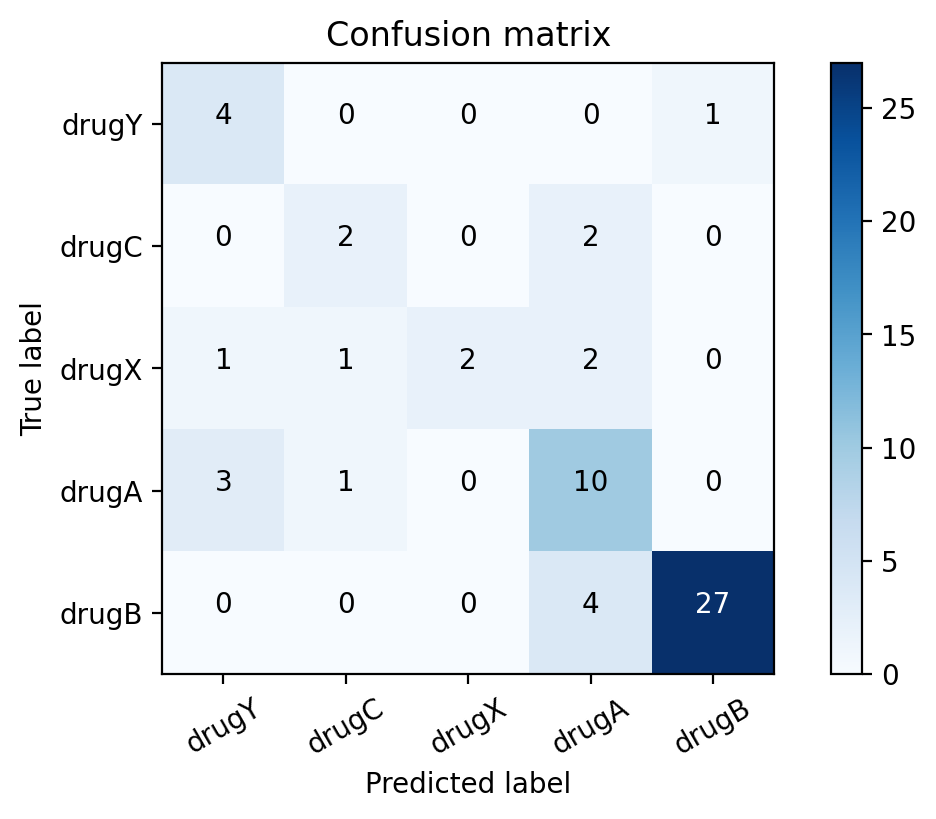

In [68]:
classes = ['drugY','drugC','drugX', 'drugA','drugB']
plt.figure(dpi = 200)
plot_confusion_matrix(cm, classes)


In [69]:
acc_train = []
acc_test = []
for i in range (1,21):
    kn_classifier = KNeighborsClassifier(n_neighbors = i)
    kn_classifier.fit(x_train, y_train)
    y_pred_train = kn_classifier.predict(x_train)
    y_pred_test = kn_classifier.predict(x_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))
    

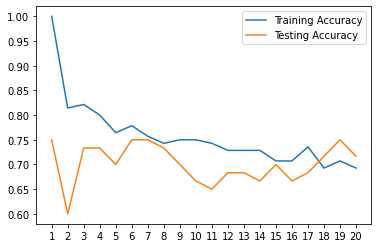

In [70]:
x = list(range(1,21))
plt.Figure(dpi =200)
plt.plot(x,acc_train,label ='Training Accuracy')
plt.plot(x,acc_test,label = 'Testing Accuracy')
plt.xticks(range(1,21))
plt.legend()